# Strategy Pattern: Measure Loss vs. Time and Number of Samples

Now that we have a basis for comparing models for regression, why not just try a bunch and pick the best one? In fact, this will be an approach that we take from now on, whenever we have multiple models available to us. In this part, we're going to design some experimental protocols that will let us formally compare different models. This will also give us practice using plots of performance as a tool for understanding individual algorithms.

While we could just take a single measure of performance and be done, this may not give us the whole story on an algorithm. Generally, we care about two quantities: _data efficiency_ and _time efficiency_. Good data efficiency means that a model performs well with as few datapoints as possible. As a counter-example, I might be able to predict someone's age from their face if I met literally every person in the world, but that clearly isn't that useful. Good time efficiency means that the model achieves good performance on a fixed set of data quickly. Many models introduce trade-offs between time efficiency and data efficiency.

# Boosting
# Random Forests
# K-NN
`from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor(n_neighbors=2)`

# Progress Bars (Helpful)
https://github.com/tqdm/tqdm

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 74.83it/s]


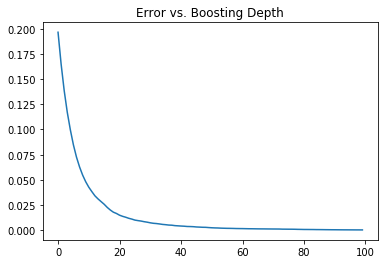

In [12]:
import numpy as np
from tqdm import trange
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

data = np.loadtxt("test_data.csv", delimiter=",")
#print(data)

Xs = data[:,0:1]
Ys = data[:,2]

accuracies = []

t = trange(100)
for i in t:
    model = GradientBoostingRegressor(n_estimators=i+1)
    model.fit(Xs, Ys)
    predictions = model.predict(Xs)
    accuracies.append(mean_squared_error(Ys, predictions))

plt.plot(range(100), accuracies)
plt.title("Error vs. Boosting Depth")
plt.show()

# Assignment:
1. Plot performance vs. time for GradientBoost (using decision trees). Pick a cutoff number of models.
2. Plot Performance vs. Number of Input Points for K-NN and GradientBoost.
3. Plot Time vs. Number of Input Points for K-NN, GradientBoost, and Polynomial.

# Stretch Goals:
- Run the tests multiple times and compute means and standard deviations. Plot 95% confidence regions around each curve.
- Run the experiment with other regression models from sklearn.